# Random forest
### Company

#### Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows:

The company dataset looks like this: 

-Sales -- Unit sales (in thousands) at each location
-Competitor Price -- Price charged by competitor at each location
-Income -- Community income level (in thousands of dollars)
-Advertising -- Local advertising budget for company at each location (in thousands of dollars)
-Population -- Population size in region (in thousands)
-Price -- Price company charges for car seats at each site
-Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving 
location for the car seats at each site
-Age -- Average age of the local population
-Education -- Education level at each location
-Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
-US -- A factor with levels No and Yes to indicate whether the store is in the US or not

    
#### Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Company_Data.csv')

In [3]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

### Data Exploration

In [4]:
df.shape

(400, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [7]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
df.value_counts()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  Education  Urban  US 
0.00   139        24      0            358         185    Medium     79   15         No     No     1
8.65   123        76      18           218         120    Medium     29   14         No     Yes    1
8.75   143        77      25           448         156    Medium     43   17         Yes    Yes    1
8.74   155        80      0            237         124    Medium     37   14         Yes    No     1
8.73   129        76      16           58          121    Medium     69   12         Yes    Yes    1
                                                                                                  ..
6.01   131        29      11           335         127    Bad        33   12         Yes    Yes    1
5.99   117        42      10           371         121    Bad        26   14         Yes    Yes    1
5.98   124        56      11           447         134    Medium     53   12         No     Yes 

### Outlier Check


<AxesSubplot:>

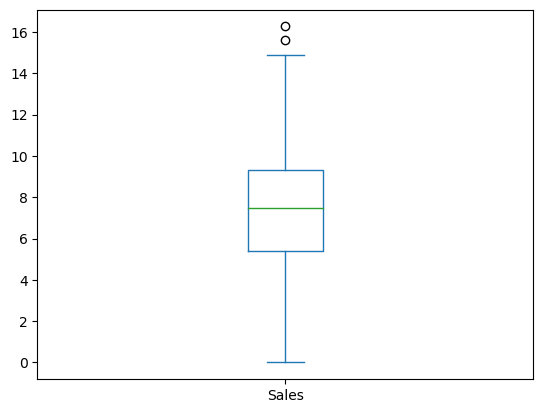

In [9]:
df["Sales"].plot(kind='box')


### As instructed the "Sales" values should be categorical, to do so we have to see the destribution of sales


<AxesSubplot:>

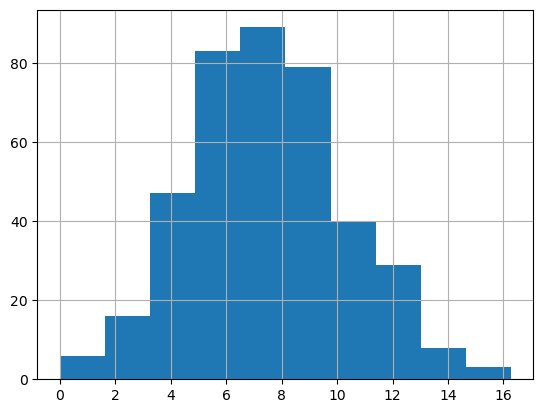

In [10]:
df['Sales'].hist()

As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two or three categories 'Low', 'Medium' and 'High' Sales

For two categories lets assume: Sales < 7.5 as “Bad=0” and Sales > 7.5 as “Good=1”

and For three categories lets divide the Sales values with Quartiles , less than first quartile as 'Low' , between Second Quartile as 'Medium and above Third Quartile as 'High'

In [11]:
df['Sales'].max()


16.27

In [12]:
16.270000/3


5.423333333333333

In [13]:
5.423333333333333*2


10.846666666666666

In [14]:
5.423333333333333*3


16.27

In [15]:
df=df.copy()
df['cat'] = pd.cut(x = df['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US     cat  
0         17   Yes  Yes    High  
1         10   Yes  Yes    High  
2         12   Yes  Yes    High  
3         14   Yes  Yes  Medium  
4         13   Yes   No     Low

In [16]:
df1 = df

In [17]:
df['cat'].value_counts()

Medium    198
High      102
Low       100
Name: cat, dtype: int64

## Visualization

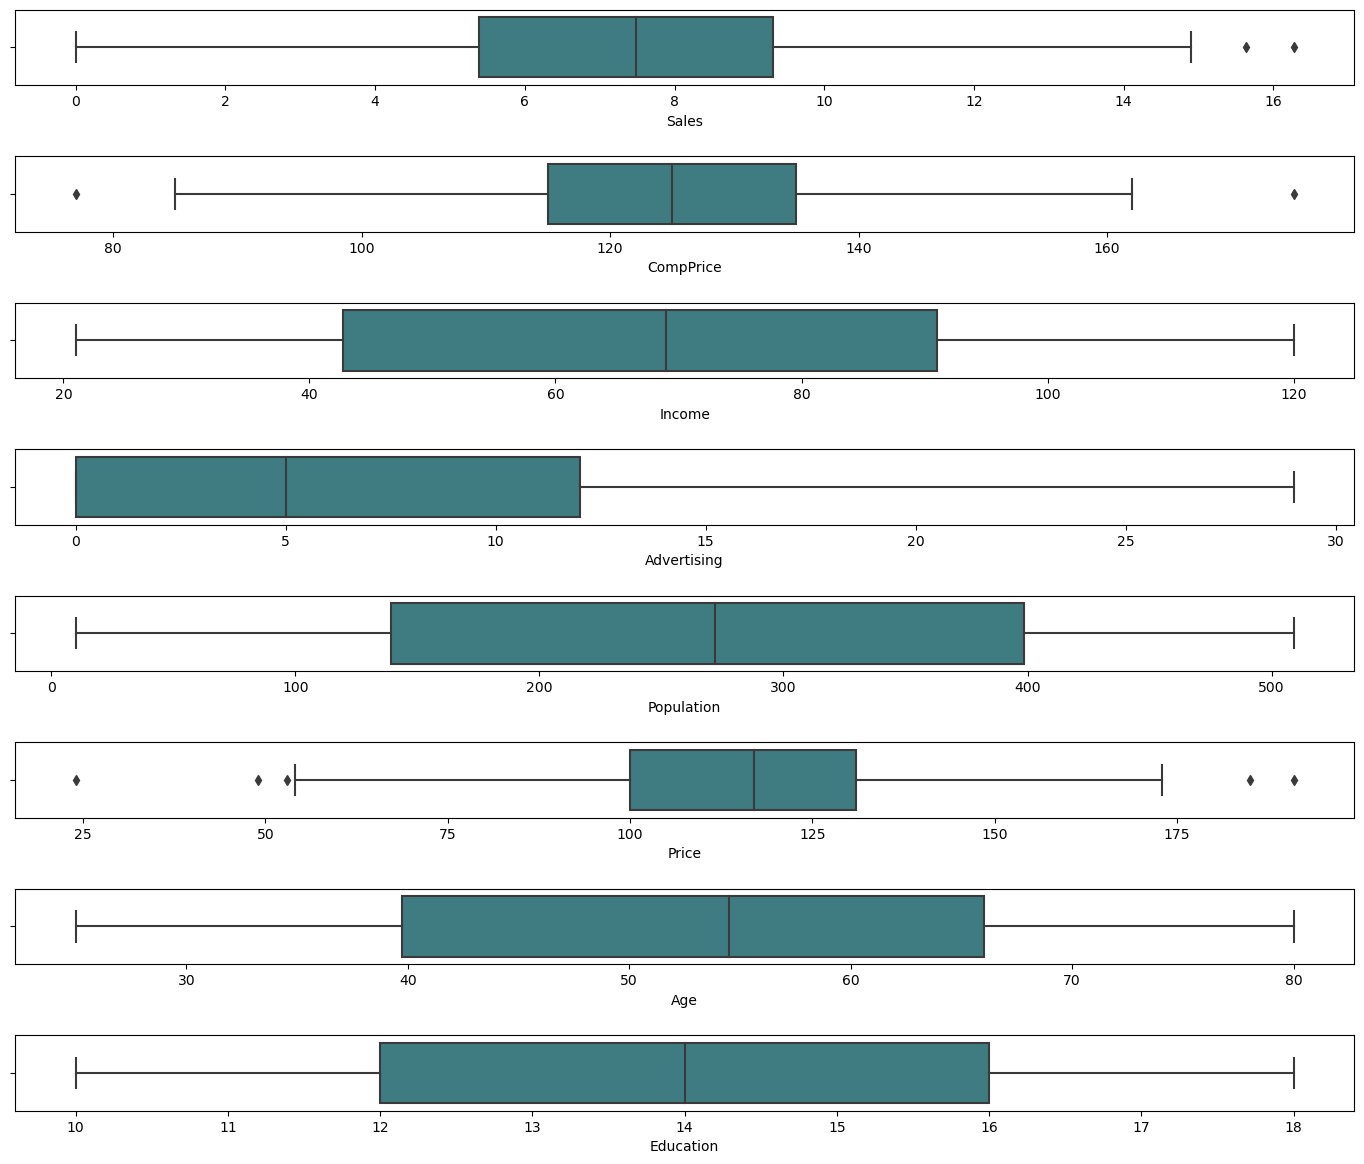

In [18]:
ot=df.copy() 
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

<AxesSubplot:>

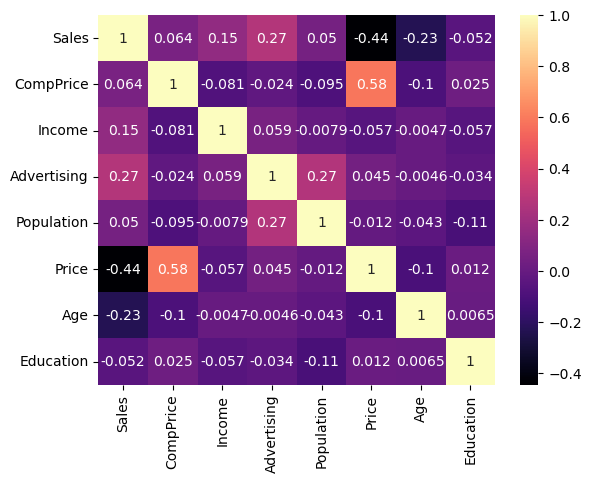

In [19]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='magma')

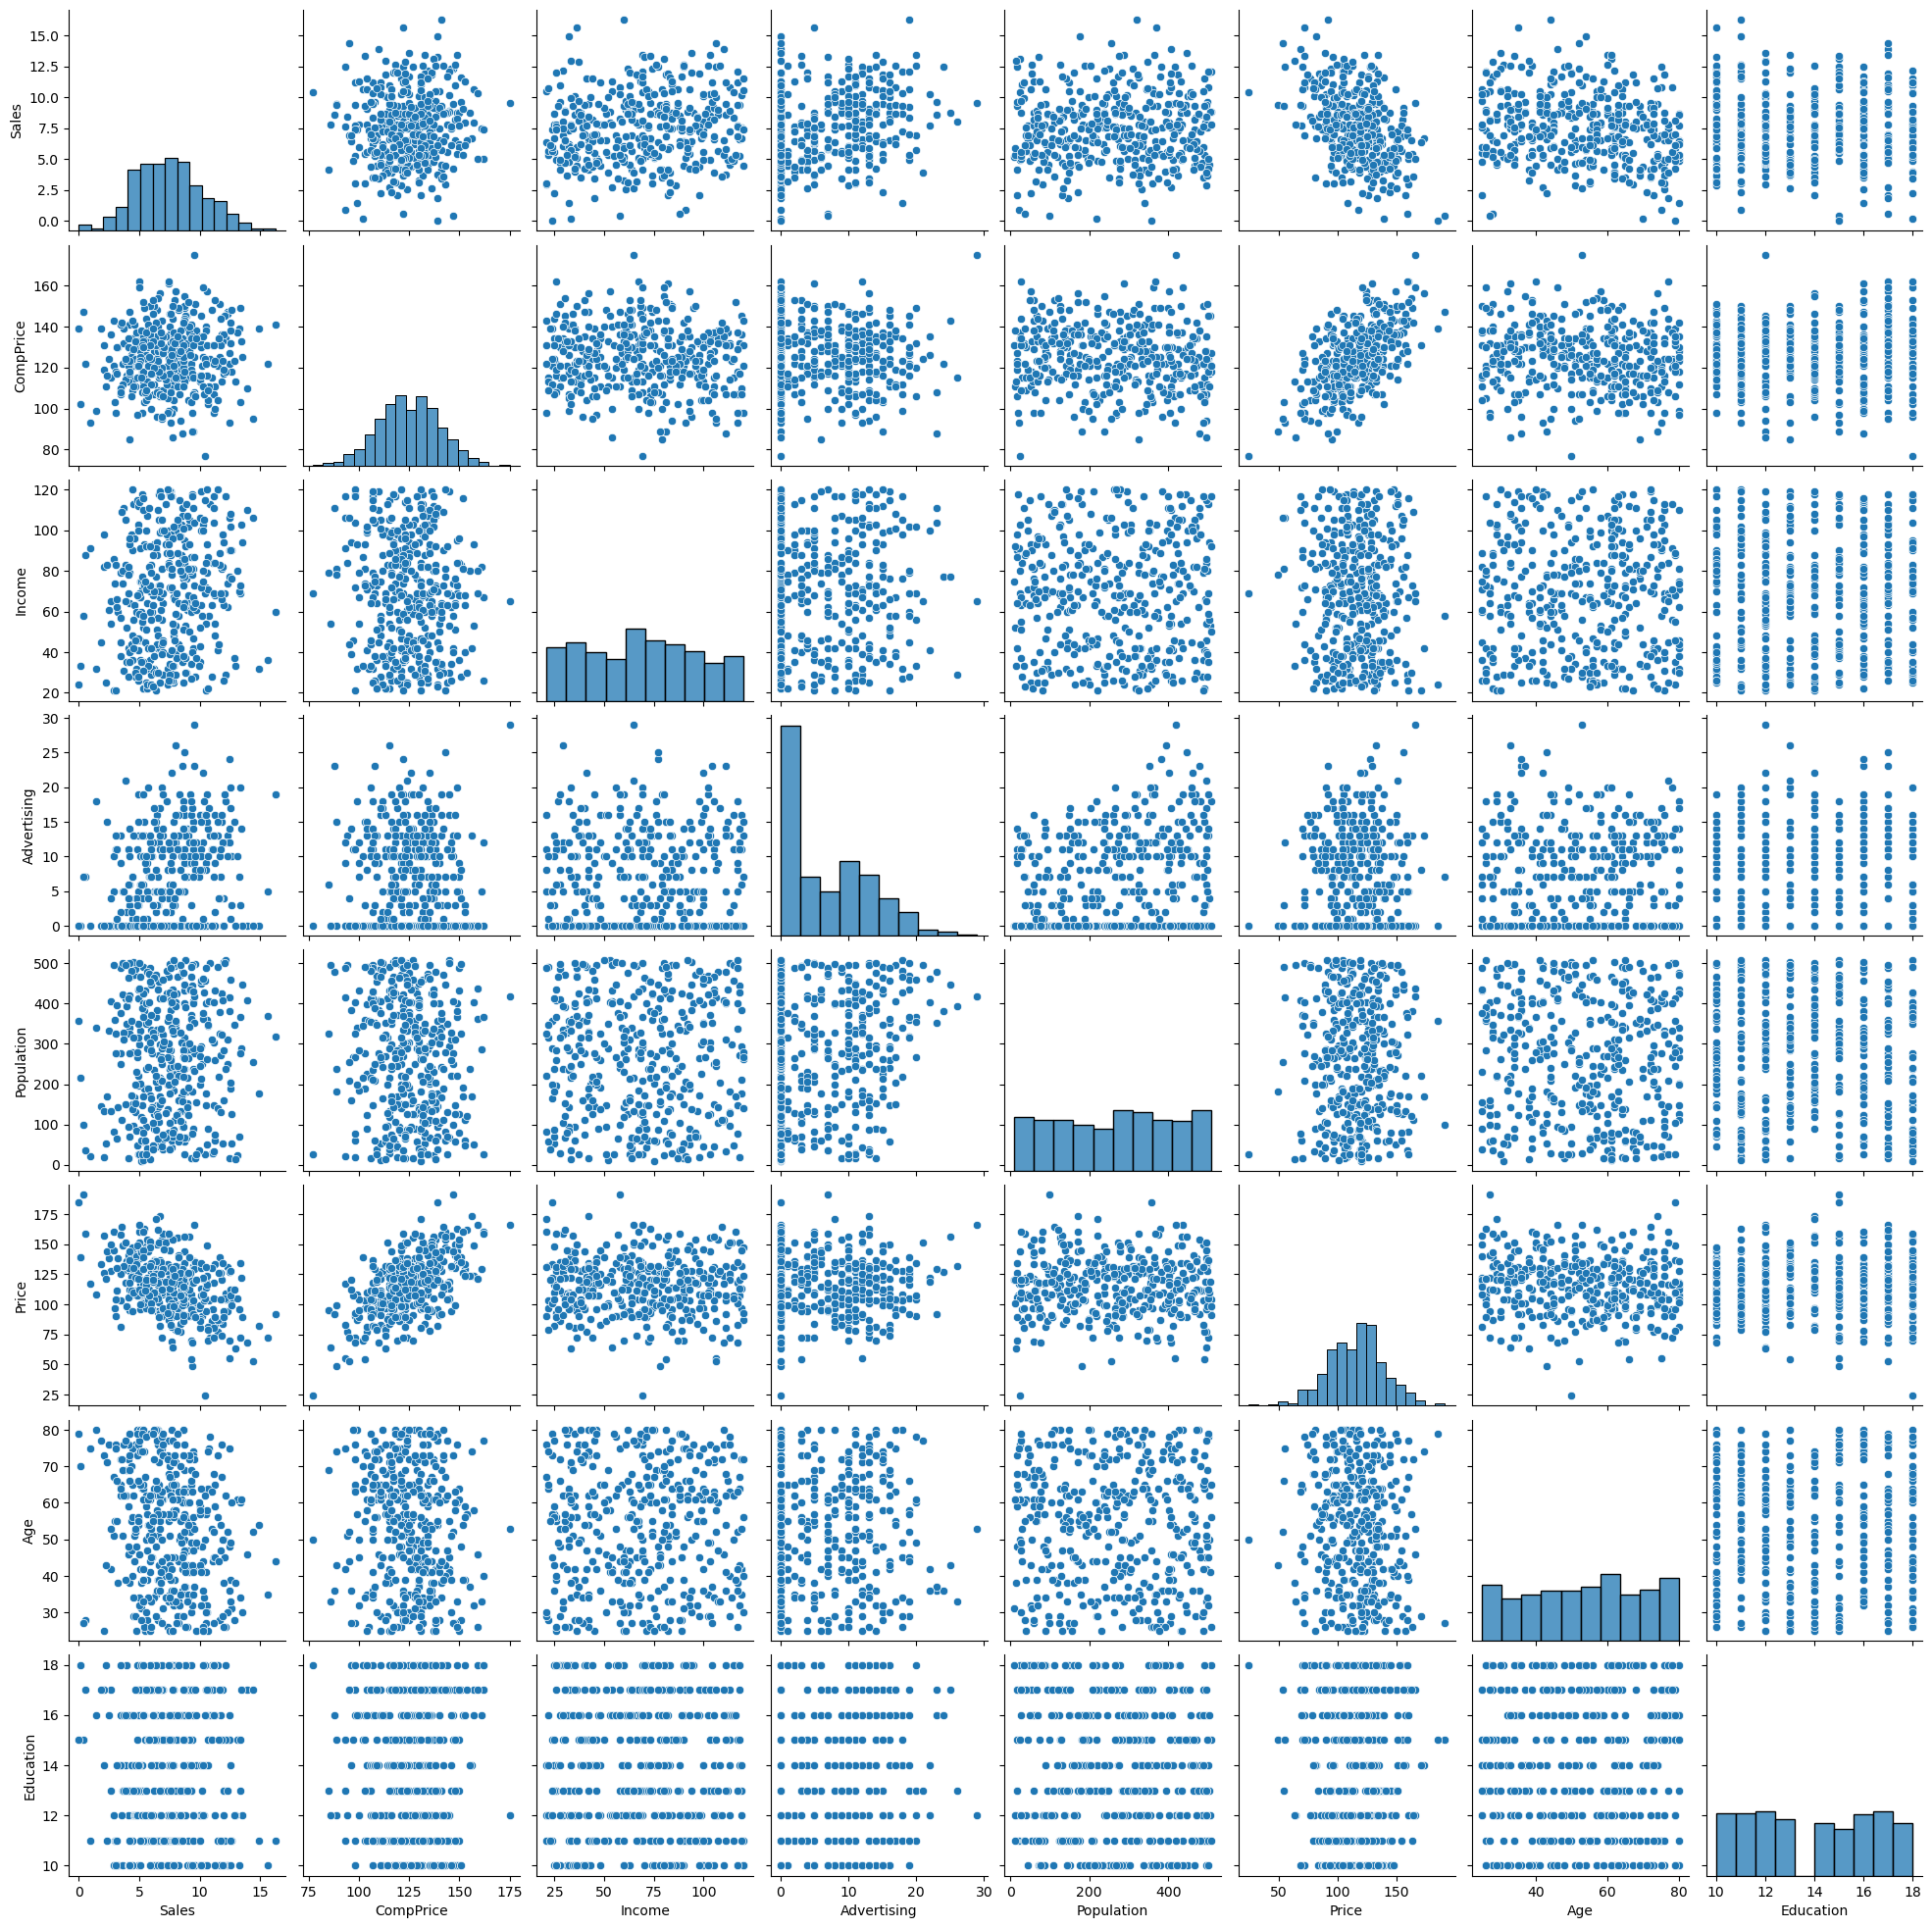

In [20]:
sns.pairplot(df)

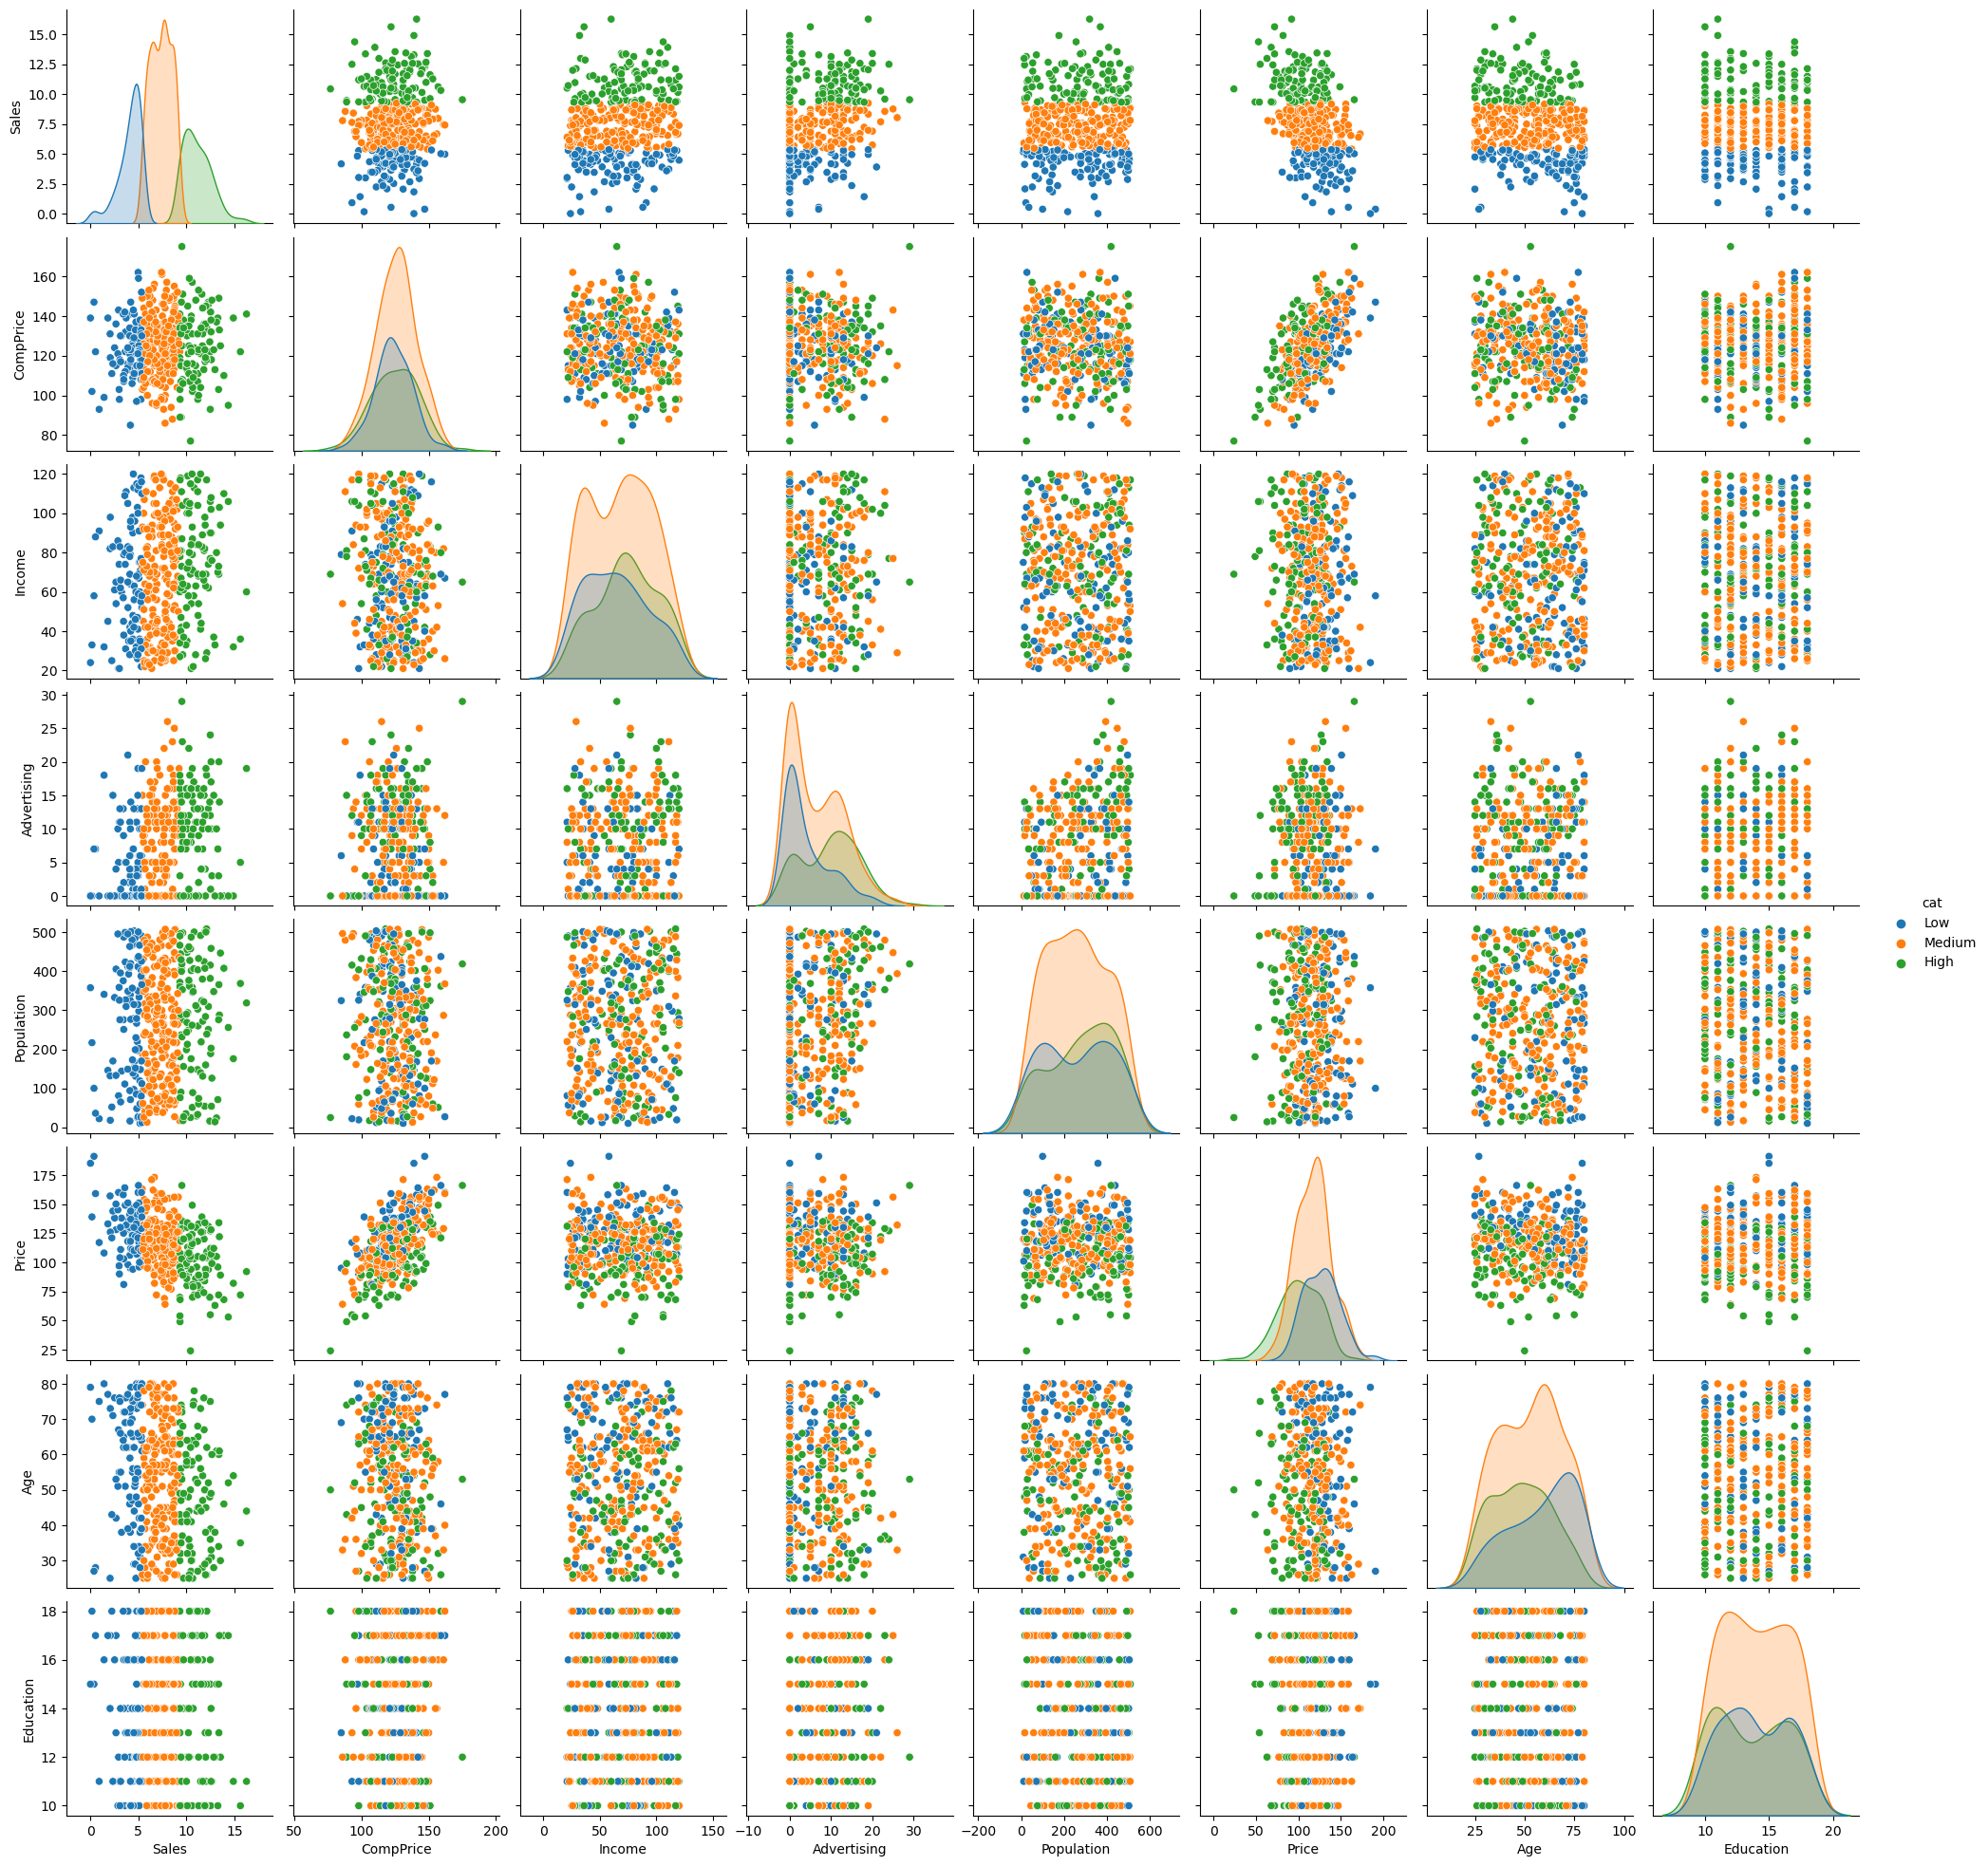

In [21]:
sns.pairplot(df, hue='cat')

Text(0.5, 1.0, 'SCate Value Counts (Pie Chart)')

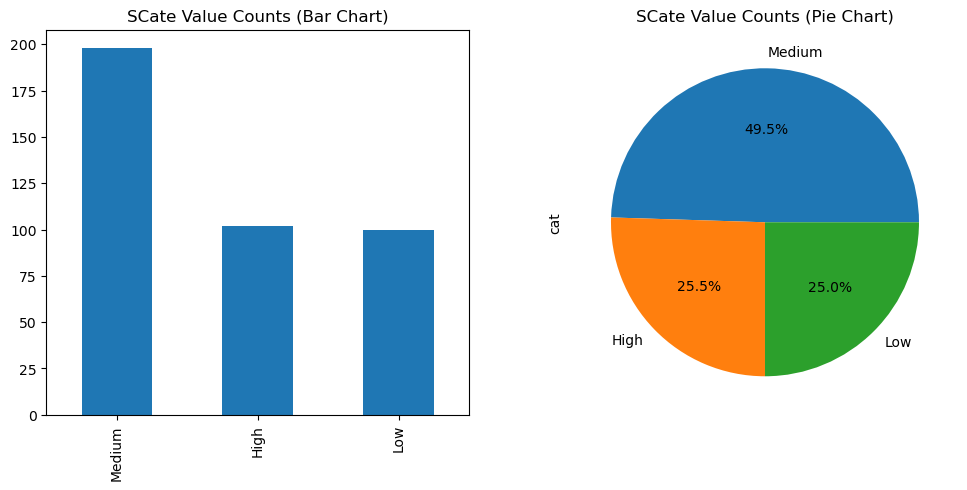

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df['cat'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('SCate Value Counts (Bar Chart)')

df['cat'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('SCate Value Counts (Pie Chart)')

### Data Preprocessing

In [23]:
#cat
df1 = df['cat']


In [24]:
df2 = df.drop('cat',axis=1)

In [25]:
df2 = pd.get_dummies(df2)

In [26]:
df2=df2.drop("Sales",axis=1)

In [27]:
ddd = pd.concat([df1,df2],axis=1)

In [28]:
ddd

cat  CompPrice  Income  Advertising  Population  Price  Age  \
0      High        138      73           11         276    120   42   
1      High        111      48           16         260     83   65   
2      High        113      35           10         269     80   59   
3    Medium        117     100            4         466     97   55   
4       Low        141      64            3         340    128   38   
..      ...        ...     ...          ...         ...    ...  ...   
395    High        138     108           17         203    128   33   
396  Medium        139      23            3          37    120   55   
397  Medium        162      26           12         368    159   40   
398  Medium        100      79            7         284     95   50   
399    High        134      37            0          27    120   49   

     Education  ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  \
0           17              1               0                 0         0   
1           10              0               1                 0         0   
2           12              0               0                 1         0   
3           14              0               0                 1         0   
4           13              1               0                 0         0   
..         ...            ...             ...               ...       ...   
395         14              0               1                 0         0   
396         11              0               0                 1         1   
397         18              0               0                 1         0   
398         12              1               0                 0         0   
399         16              0               1                 0         0   

     Urban_Yes  US_No  US_Yes  
0            1      0       1  
1            1      0       1  
2            1      0       1  
3            1      0       1  
4            1      1       0  
..         ...    ...     ...  
395          1      0       1  
396          0      0       1  
397          1      0       1  
398          1      0       1  
399          1      0       1  

[400 rows x 15 columns]

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ddd['cat'] = le.fit_transform(ddd['cat'])

In [30]:
ddd

cat  CompPrice  Income  Advertising  Population  Price  Age  Education  \
0      0        138      73           11         276    120   42         17   
1      0        111      48           16         260     83   65         10   
2      0        113      35           10         269     80   59         12   
3      2        117     100            4         466     97   55         14   
4      1        141      64            3         340    128   38         13   
..   ...        ...     ...          ...         ...    ...  ...        ...   
395    0        138     108           17         203    128   33         14   
396    2        139      23            3          37    120   55         11   
397    2        162      26           12         368    159   40         18   
398    2        100      79            7         284     95   50         12   
399    0        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        1       0  
..     ...     ...  
395      0       1  
396      0       1  
397      0       1  
398      0       1  
399      0       1  

[400 rows x 15 columns]

In [32]:
y = ddd['cat']
X = ddd.drop('cat',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.23, random_state=2)

In [35]:
X

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0                 0         0          1   
1                0               1                 0         0          1   
2                0               0                 1         0          1   
3                0               0                 1         0          1   
4                1               0                 0         0          1   
..             ...             ...               ...       ...        ...   
395              0               1                 0         0          1   
396              0               0                 1         1          0   
397              0               0                 1         0          1   
398              1               0                 0         0          1   
399              0               1                 0         0          1   

     US_No  US_Yes  
0        0       1  
1        0       1  
2        0       1  
3        0       1  
4        1       0  
..     ...     ...  
395      0       1  
396      0       1  
397      0       1  
398      0       1  
399      0       1  

[400 rows x 14 columns]

## RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [46]:
y_test_pred = rf.predict(X_test)

In [47]:
y_test_pred

array([2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2])

In [48]:
from sklearn.metrics import accuracy_score,mean_absolute_error
accuracy_score(y_test, y_test_pred)

0.6847826086956522

In [49]:
y_train_pred = rf.predict(X_train)

In [50]:
accuracy_score(y_train_pred, y_train)

1.0

In [52]:
results=pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred})
results

Actual  Predicted
94        2          2
32        2          0
225       2          2
157       0          0
356       1          2
..      ...        ...
119       2          2
385       2          2
261       2          2
243       2          2
66        2          2

[92 rows x 2 columns]

In [54]:
fi = rf.feature_importances_
fn = X.columns

<BarContainer object of 14 artists>

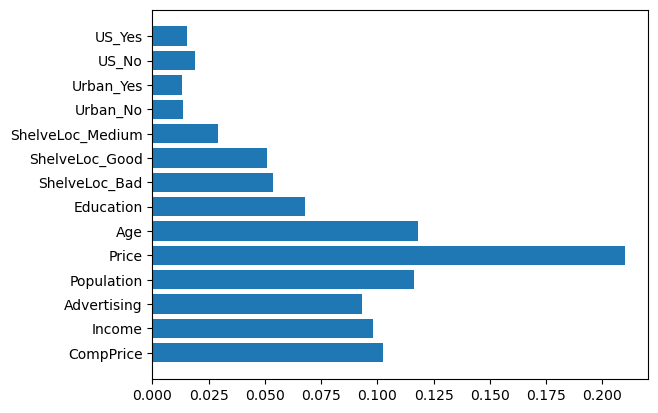

In [56]:
plt.barh(fn,fi)

[Text(0.422275641025641, 0.9705882352941176, 'Price <= 89.5\ngini = 0.637\nsamples = 194\nvalue = [80, 82, 146]'),
 Text(0.10897435897435898, 0.9117647058823529, 'ShelveLoc_Good <= 0.5\ngini = 0.332\nsamples = 24\nvalue = [30, 0, 8]'),
 Text(0.09615384615384616, 0.8529411764705882, 'Urban_No <= 0.5\ngini = 0.444\nsamples = 16\nvalue = [16, 0, 8]'),
 Text(0.08333333333333333, 0.7941176470588235, 'ShelveLoc_Bad <= 0.5\ngini = 0.5\nsamples = 12\nvalue = [8, 0, 8]'),
 Text(0.05128205128205128, 0.7352941176470589, 'US_Yes <= 0.5\ngini = 0.346\nsamples = 6\nvalue = [7, 0, 2]'),
 Text(0.02564102564102564, 0.6764705882352942, 'Population <= 42.0\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.01282051282051282, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.038461538461538464, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.07692307692307693, 0.6764705882352942, 'Education <= 13.5\ngini = 0.245\nsamples = 4\nvalue = [6, 0, 1]'),
 Te

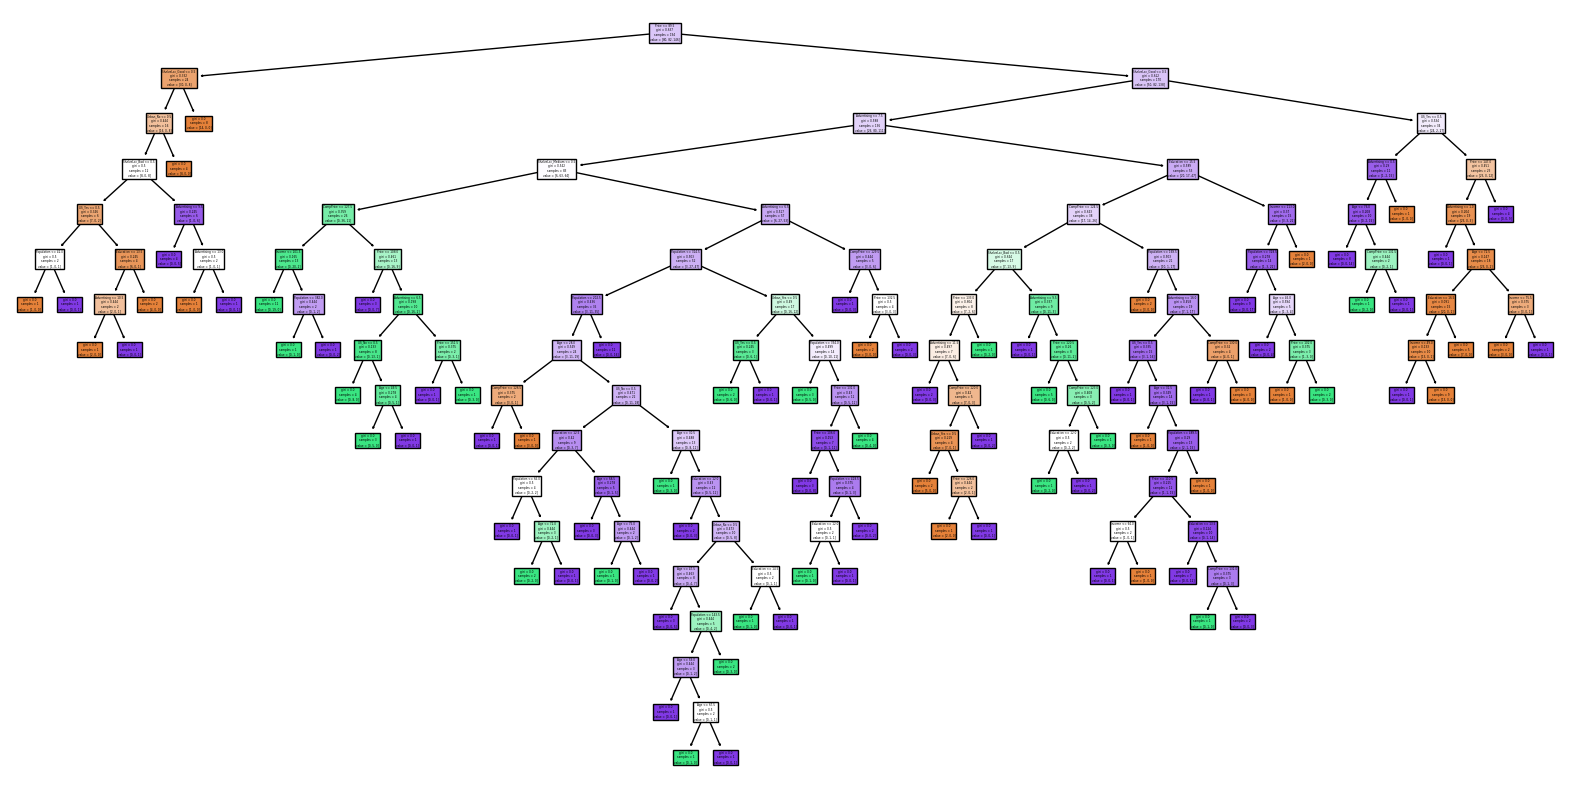

In [60]:
from sklearn.tree import plot_tree

tree_number = 0

plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(rf.estimators_[tree_number], filled=True, feature_names=X.columns)  # For classification
# OR